In [1]:
%load_ext autoreload
%load_ext line_profiler

In [2]:
%autoreload 

import sys
sys.path.append('../../..')
import pickle

import numpy as np
from tqdm import tqdm_notebook as tqdm

import matplotlib
matplotlib.rc_file('../../matplotlibrc')
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
import matplotlib.colors as colors
%matplotlib inline

import darkhistory.physics as phys
import main
import config


Bad key text.latex.preview in file ../../matplotlibrc, line 10 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
config.test(end_rs=2700, iter=2, std_only=True)
# config.test()

Running main.evolve(...): 
******************************************
Testing solution with no DM: 
****** Loading transfer functions... ******
    for propagating photons...   Done!
    for low-energy photons...  Done!
    for low-energy electrons...  Done!
    for high-energy deposition...  Done!
    for total upscattered CMB energy rate...  Done!
****** Loading complete! ******
****** Loading transfer functions... ******
    for inverse Compton (Thomson)...  Done!
    for inverse Compton (relativistic)...  Done!
    for inverse Compton (energy loss)...  Done!
****** Loading complete! ******


  0%|          | 0/7.0 [00:00<?, ?it/s]

/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


hello
hello
hello
hello
hello
hello
hello


  0%|          | 0/7.0 [00:00<?, ?it/s]

The maximum relative change in xHI and xHeI is:  5.551115123125783e-16
The maximum relative change in Tm is:  8.881784197001252e-16
The maximum relative change in f_(H ion) is:  8.774089607088698e-06
The maximum relative change in f_(H ion) is:  8.774089607088698e-06
The maximum relative change in f_(He ion) is:  0.03349412939804952
The maximum relative change in f_(Lya) is:  0.04725426861688642
The maximum relative change in f_(heat) is:  0.061161633825848716
The maximum relative change in f_(cont) is:  0.1445489911740534
The maximum relative change in the MLA parameters is:  0.0004665920252797662
Pickled solution with no DM!
Test complete!


In [4]:
config.test(end_rs=100, iter=2, std_only=False)

Running main.evolve(...): 
******************************************
Testing solution with no DM: 


  0%|          | 0/213.0 [00:00<?, ?it/s]

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hell

  0%|          | 0/213.0 [00:00<?, ?it/s]

The maximum relative change in xHI and xHeI is:  8.593403565182456e-06
The maximum relative change in Tm is:  7.300346660521484e-08
The maximum relative change in f_(H ion) is:  0.028338058314409498
The maximum relative change in f_(H ion) is:  0.028338058314409498
The maximum relative change in f_(He ion) is:  0.03349412939804952
The maximum relative change in f_(Lya) is:  0.12109472434366153
The maximum relative change in f_(heat) is:  0.061161633825848716
The maximum relative change in f_(cont) is:  0.1445489911740534
The maximum relative change in the MLA parameters is:  0.040443253244339505
Pickled solution with no DM!


  0%|          | 0/213.0 [00:00<?, ?it/s]

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hell

  0%|          | 0/213.0 [00:00<?, ?it/s]

******************************************
Testing solution with DM: 
The maximum relative change in xHI and xHeI is:  0.016683829824433172
The maximum relative change in Tm is:  0.00545179484907754
The maximum relative change in f_(H ion) is:  0.026430917832061196
The maximum relative change in f_(H ion) is:  0.026430917832061196
The maximum relative change in f_(He ion) is:  0.03349412939804952
The maximum relative change in f_(Lya) is:  0.11493849349121943
The maximum relative change in f_(heat) is:  0.061161633825848494
The maximum relative change in f_(cont) is:  0.14454899117405284
The maximum relative change in the MLA parameters is:  0.0608388122365775
Pickled solution with DM!
Test complete!


In [5]:
DM_test_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/data/DM_test_data.p', 'rb'))

ref_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220822_mDM_1e8_elec_delta_decay_3e25_n_10_high_rs_1555_coarsen_16_reion_True_rtol_1e-6_iter_2.p', 'rb'))
# ref_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220818_std_result_n_10_high_rs_1555_coarsen_16_reion_False_rtol_1e-6.p', 'rb'))

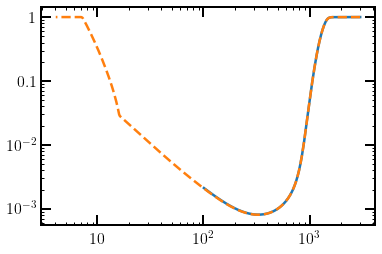

In [11]:
rs_vec_DM  = DM_test_data[-1]['rs']
rs_vec_ref = ref_data[-1]['rs']

DM_test_xHII = DM_test_data[-1]['x'][:,0]
ref_xHII = ref_data[-1]['x'][:,0]

plt.figure()

plt.loglog()

plt.plot(rs_vec_DM, DM_test_xHII)
plt.plot(rs_vec_ref, ref_xHII, '--')

In [7]:
DM_test_data[-1]['x']

array([[9.99999999e-01, 8.10359844e-02],
       [9.99999999e-01, 7.87969776e-02],
       [9.99999999e-01, 7.86875823e-02],
       [9.99999998e-01, 7.84949798e-02],
       [9.99999998e-01, 7.81575848e-02],
       [9.99999997e-01, 7.77262048e-02],
       [9.99999996e-01, 7.70419174e-02],
       [9.99999994e-01, 7.61402407e-02],
       [9.99999992e-01, 7.50401250e-02],
       [9.99999989e-01, 7.37822642e-02],
       [9.99999985e-01, 7.23791710e-02],
       [9.99999978e-01, 7.08724816e-02],
       [9.99999969e-01, 6.92857849e-02],
       [9.99999956e-01, 6.76309811e-02],
       [9.99999937e-01, 6.59131241e-02],
       [9.99999909e-01, 6.41297378e-02],
       [9.99999869e-01, 6.22718862e-02],
       [9.99999808e-01, 6.03263274e-02],
       [9.99999719e-01, 5.82746383e-02],
       [9.99999584e-01, 5.60919189e-02],
       [9.99999380e-01, 5.37508521e-02],
       [9.99999071e-01, 5.12080263e-02],
       [9.99998598e-01, 4.84192207e-02],
       [9.99997870e-01, 4.53188480e-02],
       [9.999967

In [8]:
options_dict = {
    'primary':'elec_delta', 'DM_process':'decay', 'mDM':1e8, 'lifetime':3e25,
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4,
    'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
    'coarsen_factor':16, 'distort':True, 'fexc_switch': True, 
    'MLA_funcs':None,
    'reprocess_distortion':True, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True, 'iterations':2
}

options_dict_std = {
    'primary':'elec_delta', 'DM_process':'decay', 'mDM':1e8, 'lifetime':3e40,
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':2000,
    'reion_switch':False, 'reion_method':'Puchwein', 'heat_switch':True,
    'coarsen_factor':16, 'distort':True, 'fexc_switch': True, 
    'MLA_funcs':None,
    'reprocess_distortion':True, 'nmax':50, 'rtol':1e-6, 'use_tqdm':True, 'iterations':2
}

In [9]:
%autoreload 2
# %%prun 
# res = main.evolve(**options_dict)
# res_std = main.evolve(**options_dict_std)
%lprun -m darkhistory.low_energy.atomic main.evolve(**options_dict_std)


  0%|          | 0/26.0 [00:00<?, ?it/s]

/home/hongwanl/DarkHistory/examples/DH_Upgrade/New_Results/../../../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)


hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello


  0%|          | 0/26.0 [00:00<?, ?it/s]

Timer unit: 1e-06 s

Total time: 8.80505 s
File: /home/hongwanl/.conda/envs/DarkHistory/lib/python3.8/site-packages/scipy/integrate/quadpack.py
Function: quad at line 49

Line #      Hits         Time  Per Hit   % Time  Line Contents
    49                                           def quad(func, a, b, args=(), full_output=0, epsabs=1.49e-8, epsrel=1.49e-8,
    50                                                    limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50,
    51                                                    limlst=50):
    52                                               """
    53                                               Compute a definite integral.
    54                                           
    55                                               Integrate func from `a` to `b` (possibly infinite interval) using a
    56                                               technique from the Fortran library QUADPACK.
    57                             

NameError: name 'res' is not defined

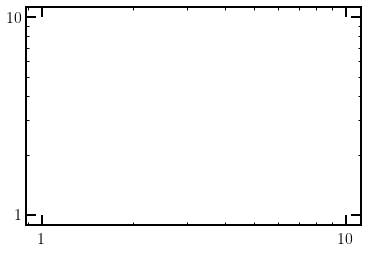

In [10]:
plt.figure()

plt.loglog()

res_rs = res[-1]['MLA'][0]
x_std = phys.x_std(res_rs)
Tm_std = phys.Tm_std(res_rs)

C_times_alpha_B = phys.peebles_C(x_std, res_rs) * phys.alpha_recomb(Tm_std, 'HI')


# plt.plot(res['MLA'][0], res['MLA'][1,:], label=r'DM $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B,\mathrm{std}})$')
plt.plot(res_std[-1]['MLA'][0], res_std[-1]['MLA'][1,:] / C_times_alpha_B, label=r'Standard $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B, \mathrm{std}})$')
# plt.plot(res_std_2['MLA'][0], res_std_2['MLA'][1,:] / C_times_alpha_B, label=r'Standard $\tilde{\alpha}_\mathrm{B} / (C_\mathrm{std} \alpha_{B, \mathrm{std}})$')
# plt.plot(res_std['MLA'][0], res_std['MLA'][1,:] / res_std_2['MLA'][1,:])
# plt.plot(res_rs, C_times_alpha_B, 'k--', label=r'$C_\mathrm{std} \alpha_{B, \mathrm{std}}$')


plt.xlabel(r'$1+z$')
plt.ylabel(r'Rate [cm$^{3}$ s$^{-1}$]')
plt.legend()

# plt.xlim(1e3, 3e3)

In [ ]:
plt.figure()

plt.loglog()

plt.plot(res_std['rs'], res_std['x'][:,0] / phys.x_std(res_std['rs']))

plt.plot(res['rs'], res['x'][:,0] / phys.x_std(res['rs']))


# plt.xlim(20, 3000)
# plt.ylim(0.975, 1.025)

In [ ]:
pickle.dump(res_std, open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220822_std_result_n_10_high_rs_1555_coarsen_16_reion_False_rtol_1e-6_iter_2.p', 'wb'))

pickle.dump(res, open('/scratch/gpfs/hongwanl/DarkHistory/data/reference_20220822_mDM_1e8_elec_delta_decay_3e25_n_10_high_rs_1555_coarsen_16_reion_True_rtol_1e-6_iter_2.p', 'wb'))


In [ ]:
nmax = 10

eng_norm_levels = np.divide(
        1., np.arange(nmax+1.)**2, out=np.ones(nmax+1)*np.nan, 
        where=np.arange(nmax+1) != 0
    )
Ennp_mat = (eng_norm_levels[None,:] - eng_norm_levels[:,None]) 

In [ ]:
Ennp_mat[1]

In [ ]:

import darkhistory.low_energy.atomic as atomic

nmax = 50

R = atomic.populate_radial(nmax)

BB, BB_2s1s = atomic.populate_bound_bound(nmax, 0.5, R, Delta_f=None, simple_2s1s=True)

# Initialize K_ij = R_ji / R_i,tot as n x n' x l x l', where i = (n,l), j = (n',l')
K = np.zeros((nmax+1, nmax+1, nmax+1, nmax+1))
# BB['up'] has dimensions n x n' x l, with transitions to l' = l+1. 
K_up = np.zeros_like(K) + BB['up'][:,:,:,None]
# print(K_up)
# print(K_up[5,3])
K_up = np.tril(np.triu(K_up, k=1), k=1)
# print(K_up[5,3])
# print(K_up)
# BB['dn'] has dimensions n x n' x l, with transitions to l' = l-1. e
K_dn = np.zeros_like(K) + BB['dn'][:,:,:,None]
K_dn = np.tril(np.triu(K_dn, k=-1), k=-1)


K = K_up + K_dn 


In [ ]:
# i = n(n+1)/2 - n + l
# j = np(np+1)/2 - np + lp

num_states = int(nmax*(nmax+1)/2)

K_2d = np.zeros((num_states, num_states))

K_2d_new = np.zeros((num_states, num_states))

states_n = np.concatenate([
    list(map(int, k*np.ones(k))) for k in range(1, nmax+1, 1)]
)
states_l = np.concatenate([np.arange(k) for k in range(1, nmax+1)])

for i in np.arange(num_states): 
    for j in np.arange(num_states): 
        K_2d[i,j] = K[states_n[i], states_l[i], states_n[j], states_l[j]]


In [ ]:
states_n_p_2d = np.tile(states_n, (num_states,1)) 
states_l_p_2d = np.tile(states_l, (num_states,1)) 
states_n_2d = np.transpose(states_n_p_2d)
states_l_2d = np.transpose(states_l_p_2d)

K_2d_new = K[states_n_2d, states_l_2d, states_n_p_2d, states_l_p_2d]

In [ ]:
# print(K_2d)
print(K_2d_new.shape)

In [ ]:
print(np.array_equal(K_2d_new, K_2d))

In [ ]:
np.arange(2, nmax+1,1)

In [ ]:
%load_ext line_profiler

In [ ]:
%autoreload 2

from darkhistory.low_energy.atomic import populate_radial
from darkhistory.low_energy.atomic import populate_radial_2D

from darkhistory.low_energy.atomic import populate_bound_bound
from darkhistory.low_energy.atomic import populate_bound_bound_2D

nmax=30

states_n = np.concatenate([
    list(map(int, k*np.ones(k))) for k in range(1, nmax+1, 1)]
)
states_l = np.concatenate([np.arange(k) for k in range(1, nmax+1)])

R_2D_up = populate_radial_2D(nmax)['up']
R_3D_up = populate_radial(nmax)['up']

R_2D_dn = populate_radial_2D(nmax)['dn']
R_3D_dn = populate_radial(nmax)['dn']


BB_3D, _ = populate_bound_bound(nmax, 0.2, populate_radial(nmax))
BB_2D, _ = populate_bound_bound_2D(nmax, 0.2, populate_radial_2D(nmax))


for i,(n,l) in enumerate(zip(states_n, states_l)): 
    for j,(n_p, l_p) in enumerate(zip(states_n, states_l)): 

        if R_2D_dn[i,j] != R_3D_dn[n, n_p, l] * (l == l_p+1): 
            print((n,l), (n_p, l_p), R_2D_dn[i,j], R_3D_dn[n, n_p, l] * (l == l_p+1))
        if R_2D_up[i,j] != R_3D_up[n, n_p, l] * (l == l_p-1): 
            print((n,l), (n_p, l_p), R_2D_up[i,j], R_3D_up[n, n_p, l] * (l == l_p-1))

for i,(n,l) in enumerate(zip(states_n, states_l)): 
    for j,(n_p, l_p) in enumerate(zip(states_n, states_l)): 
        if BB_2D['up'][i,j] != BB_3D['up'][n, n_p, l] * (l == l_p-1): 
            print((n,l), (n_p,l_p), BB_2D['up'][i,j], BB_3D['up'][n, n_p, l] * (l == l_p-1))
        if BB_2D['dn'][i,j] != BB_3D['dn'][n, n_p, l] * (l == l_p+1): 
            print((n,l), (n_p,l_p), BB_2D['dn'][i,j], BB_3D['dn'][n, n_p, l] * (l == l_p+1))


In [ ]:

nmax = 100
R_3D = populate_radial(nmax) 
R_2D = populate_radial_2D(nmax)


In [ ]:
%lprun -f populate_bound_bound populate_bound_bound(nmax, 0.2, R_3D)

In [ ]:
%lprun -f populate_bound_bound_2D populate_bound_bound_2D(nmax, 0.2, R_2D)

In [ ]:
# 
test_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/CMB_anisotropy/max_CMB_no_BR_no_distort_TLA/log10mDM_5.9620_phot_decay_log10param_26.0000_max_CMB_no_BR_no_distort_TLA_ind_205.p','rb'))

plt.figure()

plt.loglog()

plt.plot(test_data['data']['rs'], test_data['data']['f']['H ion'])

In [ ]:
test_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/full_distortion/max_CMB_nmax_200_Puchwein/log10mDM_7.2554_phot_decay_log10param_24.4924_max_CMB_nmax_200_Puchwein_ind_134.p', 'rb'))

plt.figure()

plt.loglog()

rs_ary = test_data['data'][-1]['rs']
xe_ary = test_data['data'][-1]['x'][:,0]
x_full_ary = test_data['data'][-1]['x_full']

plt.plot(rs_ary, x_full_ary[:,1:])

plt.figure()

plt.loglog()

plt.plot(rs_ary, xe_ary)



In [ ]:
test_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/full_distortion/max_CMB_nmax_200_Puchwein/log10mDM_4.0000_phot_decay_log10param_24.8451_max_CMB_nmax_200_Puchwein_ind_120.p', 'rb'))

plt.figure()

plt.loglog()

rs_ary = test_data['data'][-1]['rs']
xe_ary_1 = test_data['data'][0]['x'][:,0]
xe_ary_5 = test_data['data'][-1]['x'][:,0]
x_full_ary = test_data['data'][-1]['x_full']

plt.plot(rs_ary, x_full_ary[:,1:])

plt.figure()

plt.loglog()

plt.plot(rs_ary, xe_ary_1)
plt.plot(rs_ary, xe_ary_5)

plt.figure()

plt.loglog() 

plt.plot(test_data['data'][0]['highengphot'][0].eng, test_data['data'][0]['highengphot'][0].dNdE)

plt.xlim(1, 1e4)

plt.figure()

plt.loglog() 

plt.plot(rs_ary, test_data['data'][0]['f']['H ion'])




In [ ]:
old_DH_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/CMB_anisotropy/max_CMB_no_BR_no_distort_TLA/log10mDM_4.0976_phot_decay_log10param_26.0000_max_CMB_no_BR_no_distort_TLA_ind_195.p', 'rb'))

plt.figure()

plt.loglog() 

plt.ylim(1e-1, 3e-1)

plt.plot(old_DH_data['data']['rs'], old_DH_data['data']['f']['H ion'])
plt.plot(rs_ary, test_data['data'][0]['f']['H ion'])

plt.figure()

plt.loglog() 

plt.plot(old_DH_data['data']['rs'], old_DH_data['data']['x'][:,0])
plt.plot(rs_ary, xe_ary_1)

In [ ]:
%autoreload 

params_list = [{'pri':'phot', 'DM_process':'decay', 
                'mDM':1e4, 'inj_param':4e24
            }]

options_dict = {
    'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4,
    #'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
    'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
    'coarsen_factor':16, 'distort':True, 'fexc_switch': False, 
    'reprocess_distortion':False, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True, 'tqdm_jupyter':True, 'iterations':1
}

output_dir = '/scratch/gpfs/hongwanl/DarkHistory/scratch/'

main.embarrassingly_parallel_evolve(
    params_list, 0, options_dict, output_dir, 'max_CMB_no_BR_no_distort_TLA'
)

# options_dict = {
#     'start_rs': 3000, 'high_rs': 1.555e3, 'end_rs':4,
#     'reion_switch':True, 'reion_method':'Puchwein', 'heat_switch':True,
#     'coarsen_factor':16, 'distort':True, 'fexc_switch': True, 
#     'reprocess_distortion':True, 'nmax':10, 'rtol':1e-6, 'use_tqdm':True, 'tqdm_jupyter':True, 'iterations':1
# }

# main.embarrassingly_parallel_evolve(
#     params_list, 0, options_dict, output_dir, 'max_CMB_nmax_200_Puchwein'
# )

In [ ]:
full_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/log10mDM_4.0000_phot_decay_log10param_24.6021_max_CMB_nmax_200_Puchwein_ind_0.p', 'rb'))

old_data = pickle.load(open('/scratch/gpfs/hongwanl/DarkHistory/scratch/phot_decay_log10mDM_4.0000_log10param_24.6021_max_CMB_no_BR_no_distort_TLA_ind_0.p', 'rb'))

In [ ]:
plt.figure()

plt.loglog()

rs_vec = full_data['data']['rs']
xe_full_vec = full_data['data']['x'][:,0]
f_full_vec = full_data['data']['f']['heat']

rs_vec = old_data['data']['rs']
xe_old_vec = old_data['data']['x'][:,0]
f_old_vec = old_data['data']['f']['heat']

plt.plot(rs_vec, xe_full_vec) 
plt.plot(rs_vec, xe_old_vec)

plt.figure()

plt.loglog()

plt.plot(rs_vec, f_full_vec)
plt.plot(rs_vec, f_old_vec, '--')

In [ ]:
f_old_vec